## Data Exploration and Analysis
We want to perform Exploratory Data Analysis (EDA) over the merged data set from the data_prep notebook. But, before that we need to clean the data, look for unwanted examples (e.g. salaries < 0), look for duplicates, or currupt data. 

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
sys.path.insert(0, './helpers')
# now read in the helper functions
from helper import merge_data

In [3]:
# Load the training data set we want to explore
df_raw = pd.read_csv('./derived_data/train_data_merged.csv')
df_raw.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [3]:
# Let's see how big the data set is
df_raw.shape

(1000000, 9)

We have 1 million samples for the training and validation. Also, there are 7 features in our data set if we don't count jobId and salary.

### Check for duplicates

In [4]:
# How many unique samples we have
print(df_raw.jobId.nunique())

1000000


We don't have any duplicates. Good to go.

In [4]:
# How may samples have salaries 0. And, Why?
zeros_in_salary = df_raw[df_raw.salary == 0]
print(zeros_in_salary.shape)
zeros_in_salary

(5, 9)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


So there are 5 records in our data set with zero salary. If we think this through as why these would be zero then it can it be missing at random? or is it simply a data entry issue. Our data set is of 1 million rows and removing 5 samples having zero salary should not be a problem. So, we will get rid of them anyways.

In [5]:
# Lets get rid of the rows with zeros in salary as they are useless to us
df_raw = df_raw[df_raw.salary != 0]
df_raw.shape

(999995, 9)

The above code takes all the rows except the one has 0 in salary column. Thereby, dropping the unwanted entries. 

### Explore Null Values in the columns


In [15]:
df_raw.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

### Inspect the Target Variable

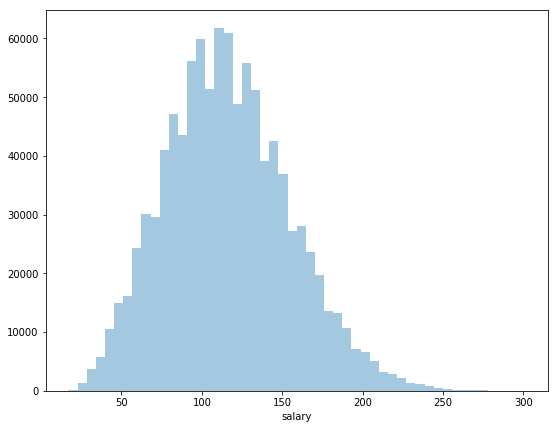

In [8]:
plt.figure(figsize=(9, 7))
sns.distplot(df_raw.salary, hist=True, kde=False)

The Salary graph above is quite a normal distibution. 

### Inspect Feature Variables

Let's dive into each of the features to see if we can find some pattern or correlation between our target variable and features. We have a data set of 1 million data points and overplotting of such data set is a common problem in DataViz. To avoid this, we will use jitter in all of our feature plots.

#### Experience vs. Salary
Generally with many years of experience, salary increases. Below graph shows relation between salary (in thousand) and experience in years.

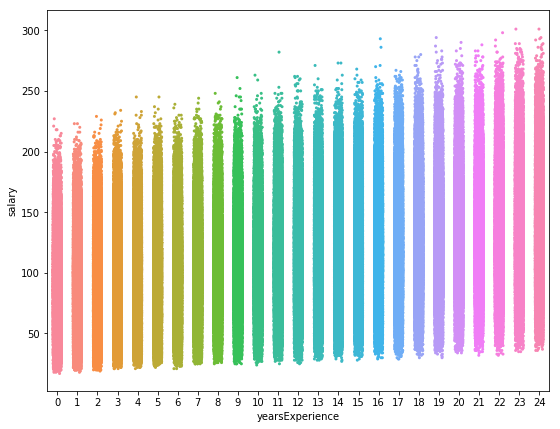

In [9]:
plt.figure(figsize=(9, 7))
sns.stripplot(df_raw.yearsExperience, df_raw.salary, jitter=0.2, size=3)

#### Major vs. Salary
Certainly, how much you earn does not depend on your education. Though few backgrounds have a higher influence on how much a person makes. As you can see in the below plot, subjects with Engineering or Business seem to rake a higher income than others. 

One interesting conclusion can be made here if you look at the label "None" in X-axis below. These are people either with no major at all or the data is corrupt in this column for which we will have to do something while we do feture engineering. 

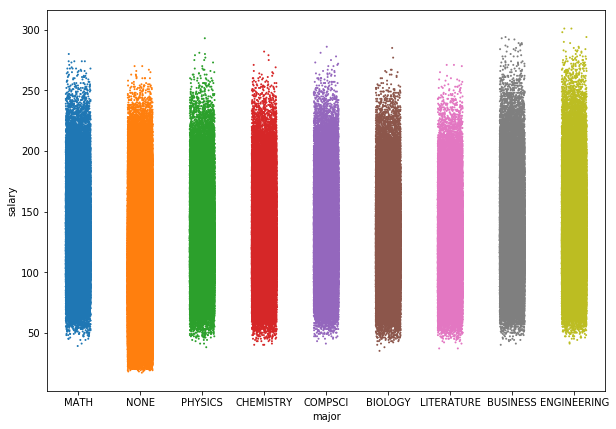

In [10]:
plt.figure(figsize=(10, 7))
sns.stripplot(df_raw.major, df_raw.salary, jitter=0.2, size=2)

#### Job Type vs. Salary
This part is kind of obvious that more challenging your job is the more you earn. Executive level employees like CEO or CTO earns more than any other employee. That's what you will be able to see here in the plot below.

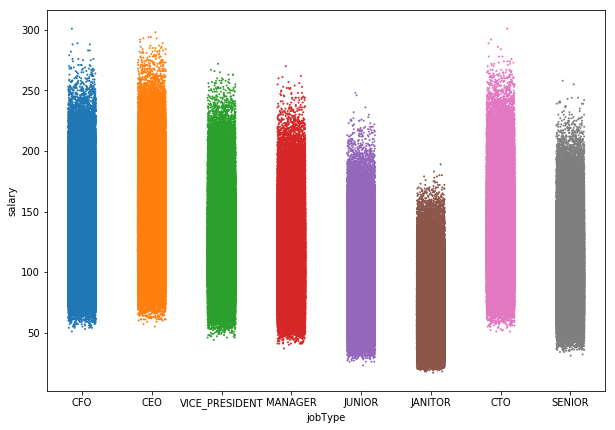

In [11]:
plt.figure(figsize=(10, 7))
sns.stripplot(df_raw.jobType, df_raw.salary, jitter=0.2, size=2)

#### Industry vs. Salary
As you know, large scale industries like oil and gas, Banking have larger turnovers compared to others and so is with the people working in there. That is what the data shows here.  Finance, oil & gas pay higher compared to the service sector. 

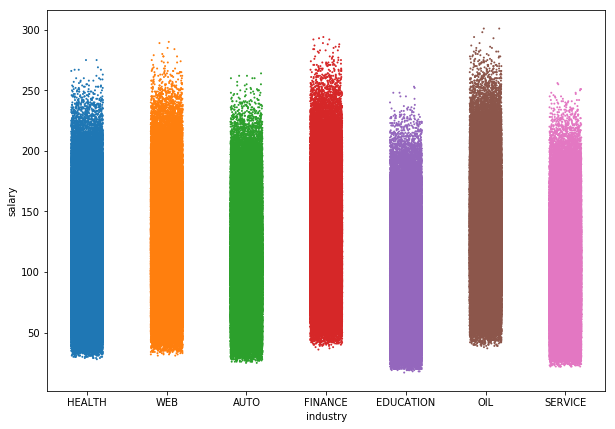

In [12]:
plt.figure(figsize=(10, 7))
sns.stripplot(df_raw.industry, df_raw.salary, jitter=0.2, size=2)

#### Degree vs. Salary
Though I am not a follower of this that the people with higher degrees earn more. I have seen people with no education and making millions. For our case, let's stick to what the data says. 

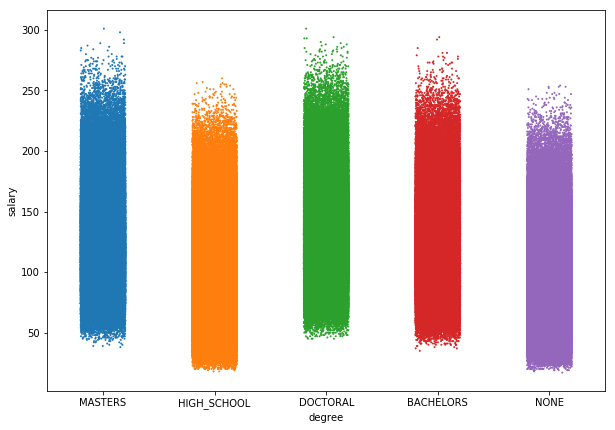

In [13]:
plt.figure(figsize=(10, 7))
sns.stripplot(df_raw.degree, df_raw.salary, jitter=0.2, size=2)

## EDA - Part 2

What all I did above can often be done in a single step. Pandas profiling is simple tool that gives you a tight analysis on your data helping you for further operations on the data set. 

In [17]:
import pandas_profiling as pdpro
pdpro.ProfileReport(df_raw)

Number of variables,10
Number of observations,999995
Total Missing (%),0.0%
Total size in memory,76.3 MiB
Average record size in memory,80.0 B
Numeric,4
Categorical,5
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [6]:
df_raw.to_csv('./derived_data/train_data_after_EDA.csv', index=False)